In [1]:
import pandas as pd

import torch

from fedcore_lossreg.preprocessing.convert import convert_df_to_dl
from fedcore_lossreg.models.repository import MLP, L2Regression

In [2]:
torch.manual_seed(42)

In [3]:
# Get data
train = pd.read_csv('data/kaggle_s3e1/train.csv')
X_test = pd.read_csv('data/kaggle_s3e1/test.csv')

train.drop(columns='id', inplace=True)
X_test.drop(columns='id', inplace=True)

X_train, y_train = train.drop(columns='MedHouseVal'), train['MedHouseVal']

# Convert to data loader
train_dl = convert_df_to_dl(X_train, y_train)
X_test = torch.tensor(X_test.to_numpy(), dtype=torch.float32)

In [4]:
# # MLP
# mlp_model = MLP(input_size=X_train.shape[1], output_size=1)
# mlp_model.fit(num_epochs=100, train_dl=train_dl, plot_loss=True)
# y_pred = mlp_model.predict(X_test)

Epoch 10/1000, L2 loss: 33.5538
Epoch 20/1000, L2 loss: 20.3777
Epoch 30/1000, L2 loss: 5.9929
Epoch 40/1000, L2 loss: 1.7499
Epoch 50/1000, L2 loss: 0.2772
Epoch 60/1000, L2 loss: 0.8679
Epoch 70/1000, L2 loss: 0.2649
Epoch 80/1000, L2 loss: 0.6806
Epoch 90/1000, L2 loss: 0.1775
Epoch 100/1000, L2 loss: 0.6161
Epoch 110/1000, L2 loss: 1.3214
Epoch 120/1000, L2 loss: 0.1990
Epoch 130/1000, L2 loss: 0.9307
Epoch 140/1000, L2 loss: 1.7791
Epoch 150/1000, L2 loss: 0.5312
Epoch 160/1000, L2 loss: 0.4817
Epoch 170/1000, L2 loss: 0.5714
Epoch 180/1000, L2 loss: 0.4429
Epoch 190/1000, L2 loss: 0.5008
Epoch 200/1000, L2 loss: 0.4327
Epoch 210/1000, L2 loss: 1.1667
Epoch 220/1000, L2 loss: 0.4108
Epoch 230/1000, L2 loss: 0.5589
Epoch 240/1000, L2 loss: 0.8150
Epoch 250/1000, L2 loss: 0.5569
Epoch 260/1000, L2 loss: 0.6939
Epoch 270/1000, L2 loss: 0.8934
Epoch 280/1000, L2 loss: 0.3644
Epoch 290/1000, L2 loss: 0.4146
Epoch 300/1000, L2 loss: 0.2728
Epoch 310/1000, L2 loss: 0.6684
Epoch 320/1000,

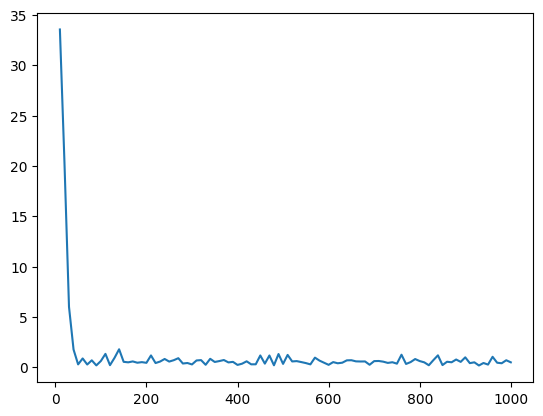

In [5]:
# Ridge
ridge_model = L2Regression(input_size=X_train.shape[1], output_size=1)
ridge_model.fit(num_epochs=1000, train_dl=train_dl, plot_loss=True)
y_pred = ridge_model.predict(X_test)

In [6]:
submission = pd.read_csv('data/kaggle_s3e1/sample_submission.csv')
submission['MedHouseVal'] = y_pred
submission.to_csv('submission.csv', index=False)